In [1]:
import os
import numpy
import pathlib
import toml
import matplotlib
from matplotlib import pyplot

In [2]:
matplotlib.rc_file_defaults()

In [111]:
simpath = pathlib.Path(os.path.expandvars('$GROUP_FOLDER/home-folder/reinhardt/simruns/2019-11-27'))

In [112]:
simpath

PosixPath('/run/user/357100522/gvfs/smb-share:server=sun.amolf.nl,share=tenwolde/home-folder/reinhardt/simruns/2019-11-27')

In [113]:
list(simpath.glob('run*'))

[PosixPath('/run/user/357100522/gvfs/smb-share:server=sun.amolf.nl,share=tenwolde/home-folder/reinhardt/simruns/2019-11-27/run_S10.0k'),
 PosixPath('/run/user/357100522/gvfs/smb-share:server=sun.amolf.nl,share=tenwolde/home-folder/reinhardt/simruns/2019-11-27/run_S0.5k'),
 PosixPath('/run/user/357100522/gvfs/smb-share:server=sun.amolf.nl,share=tenwolde/home-folder/reinhardt/simruns/2019-11-27/run_S0.1k'),
 PosixPath('/run/user/357100522/gvfs/smb-share:server=sun.amolf.nl,share=tenwolde/home-folder/reinhardt/simruns/2019-11-27/run_S5.0k'),
 PosixPath('/run/user/357100522/gvfs/smb-share:server=sun.amolf.nl,share=tenwolde/home-folder/reinhardt/simruns/2019-11-27/run_S20.0k'),
 PosixPath('/run/user/357100522/gvfs/smb-share:server=sun.amolf.nl,share=tenwolde/home-folder/reinhardt/simruns/2019-11-27/run_S1.0k')]

In [3]:
def load_run(path):
    path = pathlib.Path(path)
    info = toml.load(path / 'info.toml')
    mut_inf = numpy.load(path / 'mutual_information.npz')
    data = {}
    for key, val in mut_inf.items():
        data[key] = numpy.mean(val, axis=0)
    return {'info': info, 'data': data}

In [4]:
#simulation_results = [load_run(path) for path in simpath.glob('run*')]
#simulation_results = [load_run(pathlib.Path.home() / 'testrun')]
simulation_results = [load_run(pathlib.Path('/data/2019-12-04/run_S5.0k-3'))]

In [5]:
simulation_results[0]['info']

{'num_responses': 180,
 'num_signals': 5000,
 'output': 'run_S5.0k-3',
 'signal_path': 'signals_5.0k.npz',
 'distribution_path': 'distribution_20k.npy',
 'num_processes': 36,
 'description': 'Try batching responses\n',
 'kde_estimate': {'size': 20000,
  'signal': {'length': 16000, 'initial': 4000},
  'response': {'initial': 1000}},
 'signal': {'length': 50000,
  'components': ['S'],
  'reactions': [{'k': 20.0, 'reactants': [], 'products': ['S']},
   {'k': 0.005, 'reactants': ['S'], 'products': []}]},
 'response': {'length': 50000,
  'batch_size': 500,
  'components': ['X'],
  'reactions': [{'k': 0.005, 'reactants': ['S'], 'products': ['S', 'X']},
   {'k': 0.02, 'reactants': ['X'], 'products': []}]},
 'run': {'started': datetime.datetime(2019, 12, 3, 16, 44, 28, 792611, tzinfo=<toml.tz.TomlTz object at 0x7f872ed562d0>),
  'invocation': ['/home/ipausers/reinhardt/Gillespie/mutual_information.py'],
  'node': 'node14.hollandia.amolf.nl',
  'completed_responses': 180,
  'ended': datetime.da

In [191]:
180*200

36000

In [296]:
numerical_x = numpy.array([6.10351562e-01, 1.22070312e+00, 2.44140625e+00, 4.88281250e+00,
       9.76562500e+00, 1.95312500e+01, 3.90625000e+01, 7.81250000e+01,
       1.56250000e+02, 3.12500000e+02, 6.25000000e+02, 1.25000000e+03,
       2.50000000e+03])
numerical = numpy.array([0.07155042, 0.07221034, 0.07352942, 0.07616464, 0.08142376,
       0.09190024, 0.1127109 , 0.15391634, 0.23541893, 0.39725253,
       0.72029812, 1.36630923, 2.65833046])

In [10]:
numerical_x = numpy.array([  3.2       ,   4.75518173,   7.06617289,  10.50029256,
         15.60337477,  23.18652581,  34.45504493,  51.2       ,
         76.0829076 , 113.0587662 , 168.00468091, 249.65399638,
        370.98441288, 551.2807189 , 819.2       ])
numerical = numpy.array([0.16057347, 0.16313811, 0.16753439, 0.17376199, 0.18328551,
        0.19683625, 0.21770779, 0.24809272, 0.29384163, 0.36153363,
        0.46213797, 0.61138198, 0.83304402, 1.1629737 , 1.65274695])

In [12]:
# kappa = 20
# lamda = 0.005
# rho = 0.005
# mu = 0.02

numerical_x = numpy.array([  3.2       ,   4.75518173,   7.06617289,  10.50029256,
         15.60337477,  23.18652581,  34.45504493,  51.2       ,
         76.0829076 , 113.0587662 , 168.00468091, 249.65399638,
        370.98441288, 551.2807189 , 819.2       ])

numerical = numpy.array([0.07479552, 0.07630788, 0.07889759, 0.0825603 , 0.08814903,
        0.09607703, 0.10823872, 0.12585288, 0.15221438, 0.19097506,
        0.24826353, 0.33292631, 0.45843805, 0.64515182, 0.9223015 ])

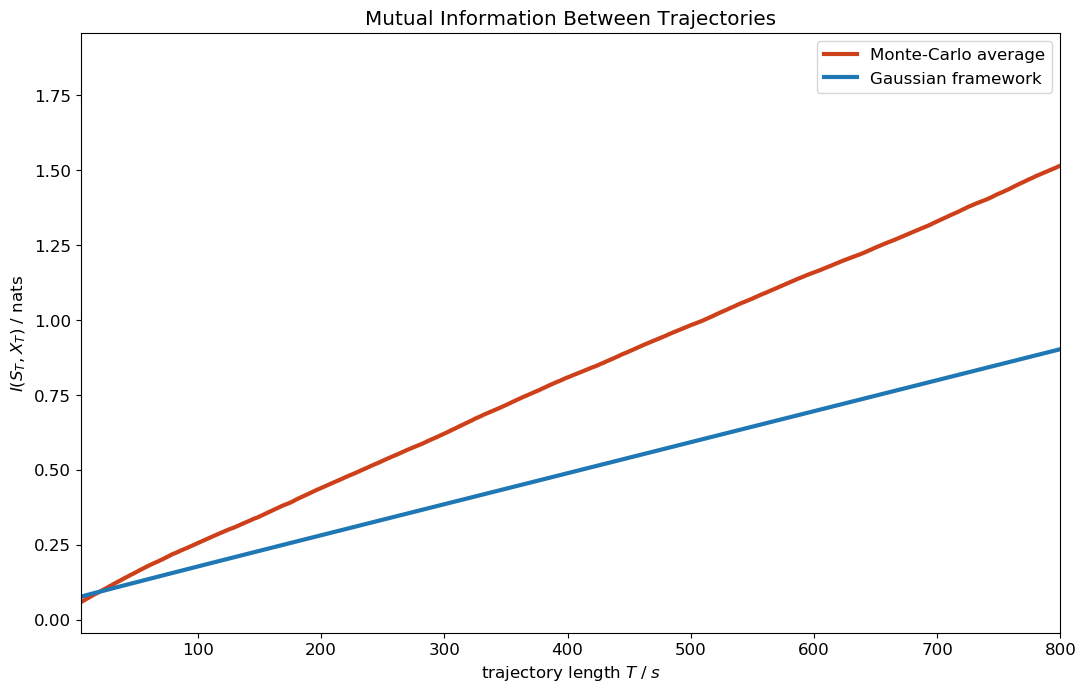

In [13]:
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'TeX Gyre Heros'})

for res in sorted(simulation_results, key=lambda x: x['info']['num_signals']):
    pyplot.plot(res['data']['trajectory_length'], res['data']['mutual_information'], label=f"Monte-Carlo average", linewidth=3, color='#CD401A')

pyplot.plot(numerical_x, numerical, label='Gaussian framework', linewidth=3)
    
pyplot.legend();
pyplot.xlim(5,800)
pyplot.title('Mutual Information Between Trajectories')
pyplot.ylabel('$I(S_T, X_T)$ / nats')
pyplot.xlabel('trajectory length $T \;/\\; s$')
pyplot.gcf().set_size_inches(28/2.54, 18/2.54)
pyplot.tight_layout();
pyplot.savefig('signals.pdf')

In [8]:
mi = simulation_results[0]['data']['mutual_information']
mi_x = simulation_results[0]['data']['trajectory_length']
start = 4500
(numerical[-1] - numerical[3]) / (numerical_x[-1] - numerical_x[3]), (mi[-1] - mi[start]) / (mi_x[-1] - mi_x[start])

(0.0010383844488558852, 0.0017764203853393537)

In [231]:
numerical.size

15

In [9]:
numpy.log(1/0.0010383844488558852 * 0.0017764203853393537)

0.5369342292247168

In [3]:
mut_inf = numpy.load(pathlib.Path('/data/2019-12-04/run_S5.0k-3') / 'mutual_information.npz')
comp_per_sig = mut_inf['mutual_information'].reshape((180,500, -1))
timestamps = mut_inf['trajectory_length']

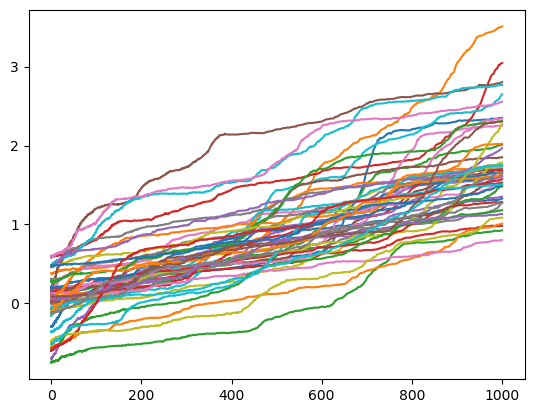

In [6]:
for i, t, m in zip(range(50), timestamps, numpy.mean(comp_per_sig, axis=1)):
    pyplot.plot(t, m)

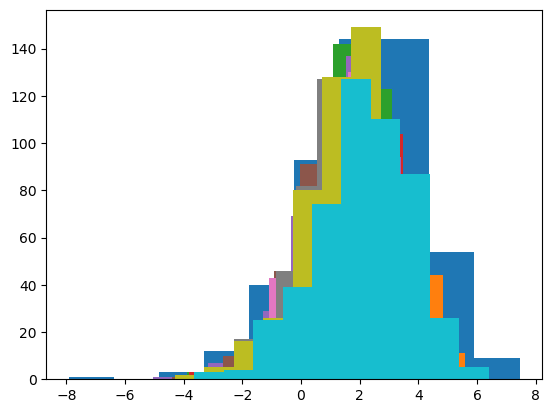

In [12]:
for _, data in zip(range(10), comp_per_sig[...,-100]):
    pyplot.hist(data)

(-0.05, 0.05)

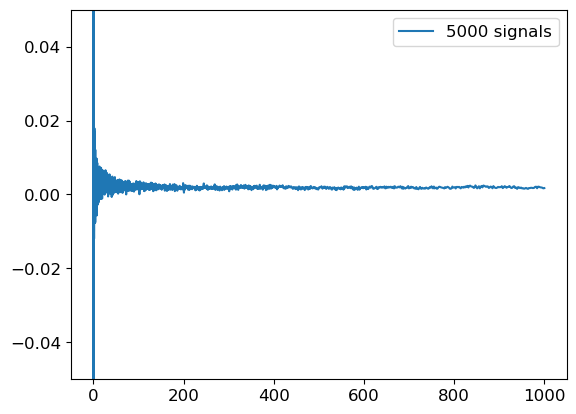

In [302]:
for res in simulation_results:
    t = res['data']['trajectory_length']
    pyplot.plot(t[1:], numpy.diff(res['data']['mutual_information']) / numpy.diff(t), label=f"{res['info']['num_signals']} signals")
    #pyplot.plot(t[1:], numpy.diff(res['data']['conditional_entropy']) / numpy.diff(t), label=f"{res['info']['num_signals']} signals")

pyplot.legend()
pyplot.ylim(-0.05,0.05)

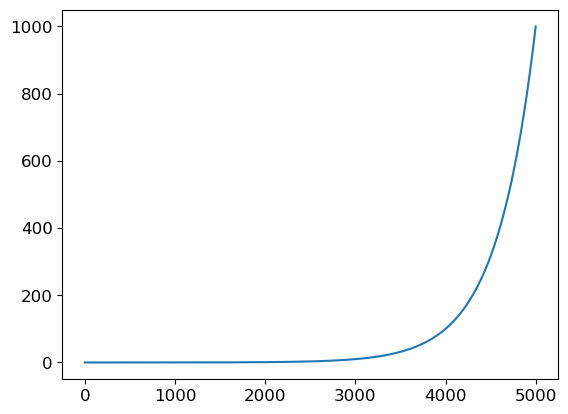

In [303]:
t = simulation_results[0]['data']['trajectory_length']
pyplot.plot(numpy.arange(t.size), t);

In [105]:
points = numpy.load(simpath / 'distribution_20k.npy')
pyplot.scatter(x=points.T[0], y=points.T[1])

FileNotFoundError: [Errno 2] No such file or directory: '/run/user/357100522/gvfs/smb-share:server=sun.amolf.nl,share=tenwolde/home-folder/reinhardt/simruns/2019-11-27/distribution_20k.npy'

In [65]:
points.shape

(20000, 2)

In [66]:
from scipy.stats import gaussian_kde

joint_estimate = gaussian_kde(points.T)
sig_estimate = gaussian_kde(points.T[0])
res_estimate = gaussian_kde(points.T[1])

In [68]:
points = joint_estimate.resample(19999)
p_zero = joint_estimate.logpdf(points) - sig_estimate.logpdf(points[0]) - res_estimate.logpdf(points[1])
numpy.mean(p_zero), numpy.std(p_zero)

(0.07244385492911486, 0.3712414643963079)